# Exercises

## Reading the data

In [3]:
import hmp
import numpy as np
from hmp import simulations

epoch_data = hmp.utils.load('data.nc')# Electrode values
info = simulations.simulation_positions() # position of the electrodes
epoch_data

<xarray.Dataset> Size: 854MB
Dimensions:      (epochs: 500, channels: 59, samples: 905, participant: 4)
Coordinates:
  * epochs       (epochs) int64 4kB 0 1 2 3 4 5 6 ... 494 495 496 497 498 499
  * channels     (channels) <U7 2kB 'EEG 001' 'EEG 002' ... 'EEG 059' 'EEG 060'
  * samples      (samples) int64 7kB 0 1 2 3 4 5 6 ... 899 900 901 902 903 904
    event_name   (epochs) <U8 16kB 'stimulus' 'stimulus' ... 'stimulus'
    rt           (participant, epochs) float64 16kB 0.96 0.33 ... 0.748 0.636
  * participant  (participant) <U1 16B 'a' 'b' 'c' 'd'
    condition    (participant) <U1 16B 'a' 'b' 'c' 'd'
Data variables:
    data         (participant, epochs, channels, samples) float64 854MB 2.426...
Attributes:
    sfreq:             500.0
    offset:            0
    lowpass:           40.0
    highpass:          0.10000000149011612
    lower_limit_RT:    0
    upper_limit_RT:    5.002
    reject_threshold:  inf
    n_trials:          2000

## Exercise 0 (1 point): Describing the data

Familiarize yourself with the data. 

Describe:
- the number of simulated trials
- the associated behavioral variable
- the number of levels within the conditions
- the number of electrodes

__Answer__:

Plot the difference in mean reaction time between all the conditions. You can either use xarray, or go with pandas using
```epoch_data.rt.to_dataframe().iloc[:,:-1]```

[!note] **to select a condition you can either use the coordinate 'condition' or 'participant', in this dataset it's the same**

Plot a histogram (or a kernel density plot) for each condition.

Comment on the differences between conditions (e.g. would a statistical test suggest a difference between A and C?)

__Answer__:

## Exercise 1 (0.5 point): slicing EEG space

Plot the trial-averaged activity over time with first 400 samples (hence 800 ms) for the 4 conditions.
Cherry pick an electrode that reflects interesting differences between conditions, either by visual inspection or by some justified criteria (e.g. maximum standard deviation over all the data).

For this exercise you can either use xarray as illustrated in tutorial 1, or use numpy by extracting the numpy values using ```epoch_data.data.values```

## Exercise 2 (1 point): slicing EEG space 

Analyze the ERP for the condition by computing the difference of the ERPs for condition A (the reference condition) vs all the others on EEG 037.

To obtain the difference in the ERPs, select the condition (e.g. using 'participant')

```python
epoch_data.sel(channels='EEG 037',  samples=range(400), participant ='a')
```
And you subtract the average values at each sample from condition A to the others

Briefly describe your interpretation of the differences between A and the other conditions.

__Answer__:

## Exercise 3 (1 point): slicing time

Calculate a topographical map, take the average values of each electrode over all the data.

Use the resulting matrix of 59 electrodes with the ```plot_topomap``` function of ```mne``` to draw the average electrode activity over all times

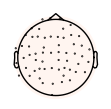

In [5]:
# To get you started: 
from mne.viz import plot_topomap
info = simulations.simulation_positions()

plot_topomap(np.zeros(59), info);# replace the zeros of course

What does this tell you about the brain event(s) occuring in that simulated dataset? Remember that these are electrical potentials.

__Answer__:

## Exercise 4 (1.5 point): slicing time per condition

do the same but make slices of 50 samples (i.e. 100ms) for each condition

Describe the temporal variations in each condition and interpret based on this representation

__Answer__:

## Exercise 5 (0.5 point): Initialize an HMP model

Transform the data by applying the PCA (take at least 4 components) and the zscoring


Use the standard assumption of a 50ms pattern with an inter-event distribution modelled by a gamma with a shape fixed to 2.

Plot the expected pattern width (see Tutorial 1) __in ms and not in samples__ (the x axis should go from 0 to 50 milliseconds)

## Exercise 6 (1 point): HMP solution on all data

Fit a backward model to the data (see Tutorial 2) and display the results using ```hmp.visu.plot_topo_timecourse(...)```

Describe the number of topographies you think are presents in the whole dataset and justify.

__Answer__:

## Exercise 7 (1 point): fit over all conditions
 
Use the ```init.fit()``` function without separating conditions, plot the topographies using ```hmp.visu.plot_topo_timecourse(...)``` and compare to your response above.

 Propose an explanation for the (eventual) discrepancy.

__Answer__:

## Exercise 8 (1.5 point): HMP per conditions
Fit the model condition by condition using the ```init.fit()``` function.

This is an example of how to subset the HMP transformed data:
```python
init_a = hmp.utils.condition_selection(hmp_data, epoch_data, 'a', variable='participant' )
```

Compare this representation to the histograms and the ERPs you drew in Exercise 0, 1 and 2.

__Answer__:

## Exercise 9 (1 point): ERPs centered on stimulus vs ERPs centered on the HMP event onset

Based on what you understand from the method and the online documentation, show how the trial-averaged ERP is a mis-representation of the underlying single-trial events. 

Explain why there is a less good single-trial for event 2 and event 4.

__Answer__: